In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load Train and Test Data

In [2]:
train_data = pd.read_csv('train.csv')
train_data.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [3]:
test_data = pd.read_csv('test.csv')
test_data.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324


In [4]:
train_data.columns

Index(['Id', 'v2a1', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q',
       'v18q1', 'r4h1',
       ...
       'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin',
       'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq', 'Target'],
      dtype='object', length=143)

In [5]:
train_data['Target'].value_counts()

4    5996
2    1597
3    1209
1     755
Name: Target, dtype: int64

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 142 entries, Id to agesq
dtypes: float64(8), int64(129), object(5)
memory usage: 25.8+ MB


### Data Cleaning

In [8]:
train_data.select_dtypes('float64').columns

Index(['v2a1', 'v18q1', 'rez_esc', 'meaneduc', 'overcrowding',
       'SQBovercrowding', 'SQBdependency', 'SQBmeaned'],
      dtype='object')

In [9]:
floatdata_nullcount = train_data.select_dtypes('float64').isnull().sum()
floatdata_nullcount[floatdata_nullcount > 0]

v2a1         6860
v18q1        7342
rez_esc      7928
meaneduc        5
SQBmeaned       5
dtype: int64

In [10]:
intdata_nullcount = train_data.select_dtypes('int64').isnull().sum()
intdata_nullcount[intdata_nullcount > 0]

Series([], dtype: int64)

In [11]:
objdata_nullcount = train_data.select_dtypes('object').isnull().sum()
objdata_nullcount[objdata_nullcount > 0]

Series([], dtype: int64)

In [12]:
train_data.select_dtypes('object').columns

Index(['Id', 'idhogar', 'dependency', 'edjefe', 'edjefa'], dtype='object')

In [13]:
train_data['dependency'].unique()

array(['no', '8', 'yes', '3', '.5', '.25', '2', '.66666669', '.33333334',
       '1.5', '.40000001', '.75', '1.25', '.2', '2.5', '1.2', '4',
       '1.3333334', '2.25', '.22222222', '5', '.83333331', '.80000001',
       '6', '3.5', '1.6666666', '.2857143', '1.75', '.71428573',
       '.16666667', '.60000002'], dtype=object)

In [14]:
train_data['edjefe'].unique()

array(['10', '12', 'no', '11', '9', '15', '4', '6', '8', '17', '7', '16',
       '14', '5', '21', '2', '19', 'yes', '3', '18', '13', '20'],
      dtype=object)

In [15]:
train_data['edjefa'].unique()

array(['no', '11', '4', '10', '9', '15', '7', '14', '13', '8', '17', '6',
       '5', '3', '16', '19', 'yes', '21', '12', '2', '20', '18'],
      dtype=object)

In [16]:
mapping = {'yes':1, 'no':0}
train_data['dependency'] = train_data['dependency'].replace(mapping).astype(np.float64)
train_data['edjefa'] = train_data['edjefa'].replace(mapping).astype(np.float64)
train_data['edjefe'] = train_data['edjefe'].replace(mapping).astype(np.float64)

In [17]:
test_data['dependency'] = test_data['dependency'].replace(mapping).astype(np.float64)
test_data['edjefa'] = test_data['edjefa'].replace(mapping).astype(np.float64)
test_data['edjefe'] = test_data['edjefe'].replace(mapping).astype(np.float64)

In [18]:
train_data[['dependency', 'edjefe', 'edjefa']].describe()

,dependency,edjefe,edjefa
count,9557.000000,9557.000000,9557.000000
mean,1.149550,5.096788,2.896830
std,1.605993,5.246513,4.612056
min,0.000000,0.000000,0.000000
25%,0.333333,0.000000,0.000000
50%,0.666667,6.000000,0.000000
75%,1.333333,9.000000,6.000000
max,8.000000,21.000000,21.000000


In [19]:
temp_data = train_data[train_data['v2a1'].isnull()].head()

cols = ['tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5']
temp_data[cols]

,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5
2,1,0,0,0,0
13,1,0,0,0,0
14,1,0,0,0,0
26,1,0,0,0,0
32,1,0,0,0,0


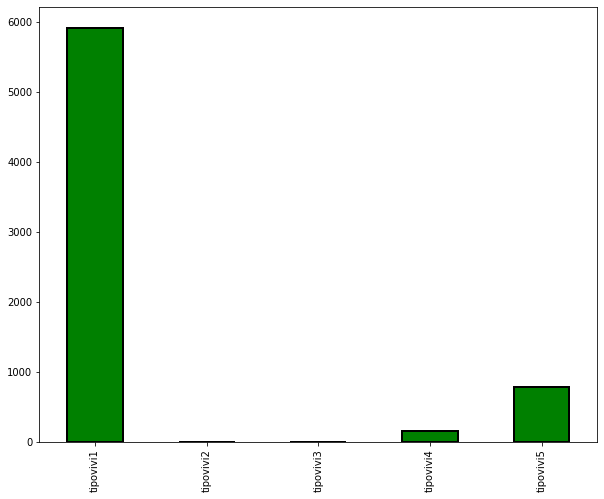

In [20]:
col_related_to_monthrent = [col for col in train_data if col.startswith('tipo')]

train_data.loc[train_data['v2a1'].isnull(), col_related_to_monthrent].sum().plot(kind='bar', figsize=(10,8), color='green', edgecolor='k', linewidth=2)

In [21]:
train_data['v2a1'].fillna(value=0, inplace=True)
test_data['v2a1'].fillna(value=0, inplace=True)

train_data[['v2a1']].isnull().sum()

v2a1    0
dtype: int64

In [22]:
household_head = train_data.loc[train_data['parentesco1'] == 1].copy()
household_head.groupby('v18q')['v18q1'].apply(lambda x:x.isnull().sum())

v18q
0    2318
1       0
Name: v18q1, dtype: int64

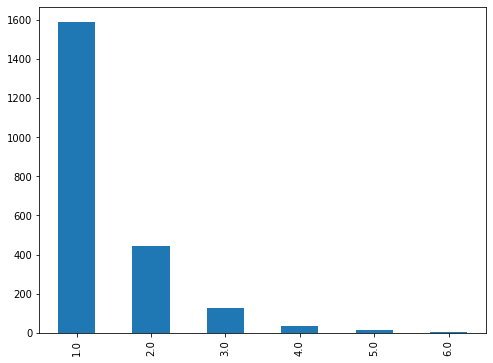

In [23]:
plt.figure(figsize = (8, 6))
col='v18q1'
train_data[col].value_counts().sort_index().plot(kind='bar', linewidth = 2)

In [24]:
train_data['v18q1'].fillna(value=0, inplace=True)
test_data['v18q1'].fillna(value=0, inplace=True)

In [25]:
train_data['rez_esc'].fillna(value=0, inplace=True)
test_data['rez_esc'].fillna(value=0, inplace=True)

In [26]:
#As no level of eduaction is zero, meaneduc is filled with 0
train_data['meaneduc'].fillna(value=0, inplace=True)
test_data['meaneduc'].fillna(value=0, inplace=True)

In [27]:
train_data['SQBmeaned'].fillna(value=0, inplace=True)
test_data['SQBmeaned'].fillna(value=0, inplace=True)

### Data Analysis

In [28]:
same_household_target = train_data.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)

household_traget_not_same = same_household_target[same_household_target != True]
len(household_traget_not_same)

85

In [29]:
train_data[train_data['idhogar'] == household_traget_not_same.index[0]][['idhogar', 'parentesco1', 'Target']]

,idhogar,parentesco1,Target
7651,0172ab1d9,0,3
7652,0172ab1d9,0,2
7653,0172ab1d9,0,3
7654,0172ab1d9,1,3
7655,0172ab1d9,0,2


In [30]:
#Household with the family head
households_head = train_data.groupby('idhogar')['parentesco1'].sum()

#Households without family head
households_without_head = train_data.loc[train_data['idhogar'].isin(households_head[households_head == 0].index), :]

print(households_without_head['idhogar'].nunique())

15


In [31]:
households_without_head_diff_target = households_without_head.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)
sum(households_without_head_diff_target == False)

0

In [32]:
household_traget_not_same.index

Index(['0172ab1d9', '03f4e5f4d', '0511912b6', '078a0b6e2', '09e25d616',
       '0f3e65c83', '0f9494d3a', '15a891635', '17fb04a62', '18832b840',
       '26b3a0f41', '288579c97', '28893b5e7', '2c9872b82', '2cb443214',
       '309fb7246', '30a70901d', '3c6973219', '3c73c107f', '3df651058',
       '3fe29a56b', '410194c8b', '417865404', '42ec8bef5', '43b9c83e5',
       '44f219a16', '46af47063', '4b6077882', '4c2dba109', '4dc11e11f',
       '4e19bd549', '50e064ee8', '513adb616', '54118d5d9', '55a662731',
       '564eab113', '594d3eb27', '5c3f7725d', '5c6f32bbc', '5e9329fc6',
       '614b48fb7', '636330516', '654ef7612', '67ad49822', '6833ac5dc',
       '694a0cbf4', '6a389f3de', '6bcf799cf', '6c543442a', '71cd52a80',
       '73d85d05d', '7ad269eef', '7c57f8237', '7e9d58c5c', '7ea6aca15',
       '80a66379b', '811a35744', '8242a51ec', '8420bcfca', '8ae3e74ca',
       '8bb6da3c1', '932287f5d', '9bbf7c6ca', 'a20ff33ba', 'a3288e6fa',
       'a94a45642', 'bcaa2e2f5', 'bcab69521', 'bd82509d1', 'be91

In [33]:
#Set poverty level of the members and the head of the house within a family.

for household in household_traget_not_same.index:
    target_hoh = int(train_data[(train_data['idhogar'] == household) & (train_data['parentesco1'] == 1.0)]['Target'])
#     print(target_hoh)
    train_data.loc[train_data['idhogar'] == household, 'Target'] = target_hoh
    
same_household_target = train_data.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)

household_traget_not_same = same_household_target[same_household_target != True]
len(household_traget_not_same)

0

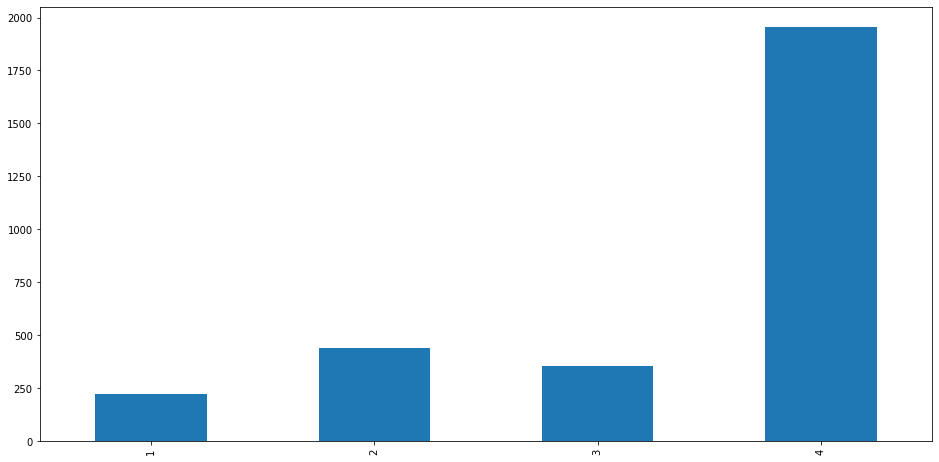

In [34]:
#Lets check for any bias in the dataset
household_head['Target'].value_counts().sort_index().plot(kind='bar', figsize=(16, 8), linewidth=2)

From Above we can see that is dataset Biased.

In [35]:
drop_cols = ['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 
        'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq']
train_data.drop(drop_cols, inplace=True, axis=1)
test_data.drop(drop_cols, inplace=True, axis=1)

train_data.shape

(9557, 134)

In [36]:
#Check for Correlation for Individual variables.

In [37]:
id_ = ['Id', 'idhogar', 'Target']

ind_var = ['v18q', 'escolari', 'rez_esc', 'dis', 'male', 'female', 
           # status
           'estadocivil1', 'estadocivil2', 'estadocivil3', 'estadocivil4', 'estadocivil5', 
           'estadocivil6', 'estadocivil7',
           # role in family
           'parentesco1', 'parentesco2',  'parentesco3', 'parentesco4', 'parentesco5', 
           'parentesco6', 'parentesco7', 'parentesco8',  'parentesco9', 'parentesco10', 
           'parentesco11', 'parentesco12',
           # level of education
           'instlevel1', 'instlevel2', 'instlevel3', 'instlevel4', 'instlevel5', 'instlevel6', 
           'instlevel7', 'instlevel8', 'instlevel9',
           'mobilephone', 'age'
          ]

In [38]:
ind_df = train_data[id_ + ind_var]

In [39]:
ind_corr_matrix = ind_df.corr()

In [40]:
upper_triangle = ind_corr_matrix.where(np.triu(np.ones(ind_corr_matrix.shape), k=1).astype(np.bool))

#feature with corr > 0.95
can_drop = [col for col in upper_triangle.columns if any(abs(upper_triangle[col]) > 0.95)]
can_drop

['female']

In [41]:
#If not male then female. so we can drop female.
train_data.drop(['female'], axis=1, inplace=True)
test_data.drop(['female'], axis=1, inplace=True)

In [42]:
#Check for Correlation for Household variables.

In [43]:
hh_var = ['v2a1', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q1', 'r4h1', 'r4h2', 
          'r4h3', 'r4m1','r4m2','r4m3', 'r4t1',  'r4t2', 'r4t3', 'tamhog', 'tamviv', 'hhsize',
          # material on outside wall
          'paredblolad', 'paredzocalo', 'paredpreb', 'pareddes', 'paredmad', 'paredzinc', 
          'paredfibras', 'paredother', 
          # material on floor
          'pisocemento','pisomoscer', 'pisoother', 'pisonatur', 'pisonotiene', 'pisomadera',
          #material on roof
          'techozinc', 'techoentrepiso', 'techocane', 'techootro', 
          'cielorazo', 
          # water provision 
          'abastaguadentro', 'abastaguafuera', 'abastaguano',
          # electricity supply
          'public', 'planpri', 'noelec', 'coopele',
          # toilet system
          'sanitario1', 'sanitario2', 'sanitario3', 'sanitario5', 'sanitario6',
          # energy source for cooking
          'energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4',
          # rubbish disposal
          'elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 'elimbasu5', 'elimbasu6', 
          # walls condition
          'epared1', 'epared2', 'epared3',
          # roof condition
          'etecho1', 'etecho2', 'etecho3', 
          # floor condition
          'eviv1', 'eviv2', 'eviv3',
          # age category count
          'hogar_nin', 'hogar_adul', 'hogar_mayor', 'hogar_total', 
          'dependency', 'edjefe', 'edjefa', 'meaneduc', 'bedrooms', 'overcrowding',
          # rent
          'tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5',
          'computer', 'television', 'qmobilephone',
          # region
          'lugar1', 'lugar2', 'lugar3', 'lugar4', 'lugar5', 'lugar6', 
          # urban - rural
          'area1', 'area2'
         ]

In [44]:
hheads = train_data.loc[train_data['parentesco1'] == 1, :]
hh_df = hheads[id_ + hh_var]

hh_corr_matrix = hh_df.corr()

upper_traingle = hh_corr_matrix.where(np.triu(np.ones(hh_corr_matrix.shape), k=1).astype(np.bool))

#feature with corr > 0.95
can_drop = [col for col in upper_traingle.columns if any(abs(upper_traingle[col]) > 0.95)]

can_drop

['tamhog', 'hhsize', 'coopele', 'hogar_total', 'area2']

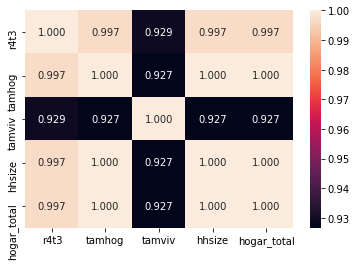

In [45]:
sns.heatmap(hh_corr_matrix.loc[hh_corr_matrix['tamhog'].abs() > 0.9, hh_corr_matrix['tamhog'].abs() > 0.9],
            annot=True, fmt='.3f')

In [46]:
# as hhsize also represent household size and it is highly correlated with 
# 'tamhog', 'hogar_total', 'r4t3', we can drop these features.
drop_cols = ['tamhog', 'hogar_total', 'r4t3']
train_data.drop(columns=drop_cols, inplace=True)
test_data.drop(columns=drop_cols, inplace=True)

train_data.shape

(9557, 130)

In [47]:
# area2 can be dropped as it can be found by area1 as well, i.e if area1 is not urban.
train_data.drop(columns='area2', inplace=True)
test_data.drop(columns='area2', inplace=True)

train_data.shape

(9557, 129)

In [48]:
#Dropping id columns
drop_cols = ['Id', 'idhogar']
train_data.drop(columns=drop_cols, inplace=True)
test_data.drop(columns=drop_cols, inplace=True)

train_data.shape

(9557, 127)

In [49]:
X = train_data.drop('Target', axis=1)
Y = train_data['Target']

In [50]:
X.shape

(9557, 126)

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score

In [52]:
seed = 101
kfolds = KFold(n_splits=5, random_state=seed, shuffle=True)

rfCls = RandomForestClassifier(n_estimators=150, random_state=seed)
results = cross_val_score(rfCls, X, Y, cv=kfolds, scoring='accuracy')


In [53]:
print(results)
print(results.mean())

[0.93462343 0.93514644 0.95656724 0.93615908 0.95133438]
0.9427661151361091


In [54]:
rfCls.fit(X, Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

In [55]:
y_pred = rfCls.predict(test_data)
y_pred

array([4, 4, 4, ..., 4, 4, 4])